In [1]:
import pandas as pd
import numpy as np
!pip install xgboost 

In [2]:
data = pd.read_csv(r"""C:\Users\bvais\Downloads\Telegram Desktop\adult 3.csv""")

In [3]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# NULL VALUES

data.isna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
print(data['workclass'].value_counts())

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


In [6]:
# which is the maximum contribution of employee prediction
print(data.occupation.value_counts())

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64


In [7]:
#male contributed much than female
print(data.gender.value_counts())

Male      32650
Female    16192
Name: gender, dtype: int64


In [8]:
print(data.education.value_counts())

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64


In [9]:
print(data.workclass.value_counts())

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


In [10]:
print(data['marital-status'].value_counts())

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64


In [11]:
print(data['marital-status'].value_counts())

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64


In [12]:
print(data.occupation.replace({'?' : 'Others'},inplace=True))

None


In [13]:
data.workclass.replace({'?' : 'Notlisted'},inplace=True)

In [14]:
print(data['workclass'].value_counts())

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Notlisted            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


In [15]:
 # list operations
data = data[data['workclass']!='Without-pay']
data = data[data['workclass']!='Never-worked']

In [16]:
print(data['workclass'].value_counts())

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Notlisted            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: workclass, dtype: int64


In [17]:
data.shape

(48811, 15)

In [18]:
# here also we can eliminate some categories like '1st-4th','5th-6th','Preschool'
data=data[data['education']!='1st-4th']
data=data[data['education']!='5th-6th']
data=data[data['education']!='Preschool']

In [19]:
print(data['education'].value_counts())

HS-grad         15768
Some-college    10873
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       834
9th               756
12th              657
Doctorate         594
Name: education, dtype: int64


In [20]:
data.shape

(47972, 15)

In [21]:
# redundancy
data.drop(columns=['education'],inplace=True)

In [22]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Notlisted,103497,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


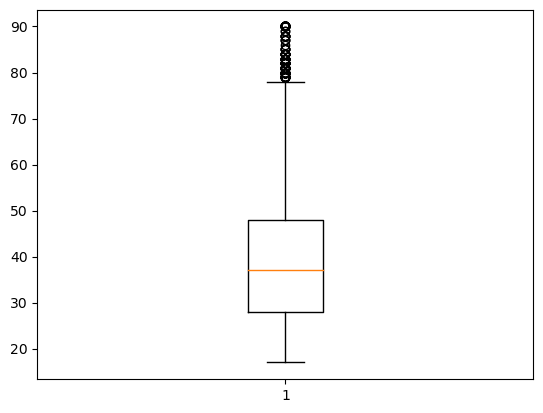

In [23]:
# outlier
import matplotlib.pyplot as plt

plt.boxplot(data['age'])
plt.show()

In [24]:
data=data[(data['age']<=75) & (data['age']>=17)]

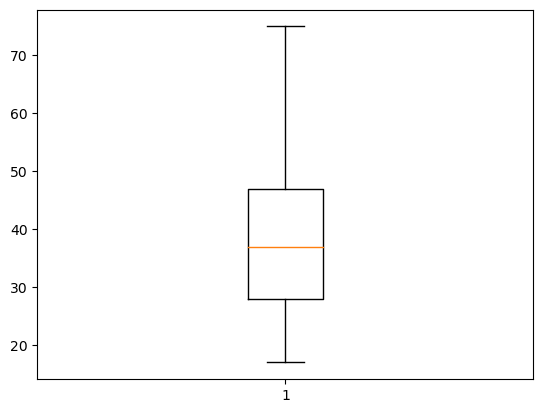

In [25]:
plt.boxplot(data['age'])
plt.show()

In [26]:
# encoding = converted categorical value to numerical value

In [27]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['workclass']=encoder.fit_transform(data['workclass'])
data['marital-status']=encoder.fit_transform(data['marital-status'])
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])
data['race']=encoder.fit_transform(data['race'])
data['gender']=encoder.fit_transform(data['gender'])
data['native-country']=encoder.fit_transform(data['native-country'])
data

C:\Users\bvais\AppData\Local\Temp\ipykernel_24240\4044988273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['workclass']=encoder.fit_transform(data['workclass'])
C:\Users\bvais\AppData\Local\Temp\ipykernel_24240\4044988273.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['marital-status']=encoder.fit_transform(data['marital-status'])
C:\Users\bvais\AppData\Local\Temp\ipykernel_24240\4044988273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,103497,10,4,8,3,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39,<=50K
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39,>50K
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39,<=50K
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39,<=50K


In [28]:
# spliting data in to X(independent variable) and Y (dependent variable)
X=data.drop(columns=['income'])# input
Y=data['income'] #output
X

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,4,6,3,2,1,0,0,40,39
1,38,3,89814,9,2,4,0,4,1,0,0,50,39
2,28,1,336951,12,2,11,0,4,1,0,0,40,39
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39
4,18,2,103497,10,4,8,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X

array([[0.13793103, 0.5       , 0.14512876, ..., 0.        , 0.39795918,
        0.95121951],
       [0.36206897, 0.5       , 0.05245126, ..., 0.        , 0.5       ,
        0.95121951],
       [0.18965517, 0.16666667, 0.21964867, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.70689655, 0.5       , 0.09446153, ..., 0.        , 0.39795918,
        0.95121951],
       [0.0862069 , 0.5       , 0.12800425, ..., 0.        , 0.19387755,
        0.95121951],
       [0.60344828, 0.66666667, 0.18648211, ..., 0.        , 0.39795918,
        0.95121951]])

In [30]:
# random state spilt should be the same ratio
#stratify mean evenally distributed the value while spilting

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=23,stratify=Y)


In [31]:
# SUPERVISE MACHINE LEARNING ALGORITHNM
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain) # input & output training xtrain= pictures , ytrain=sad and happy
predict=knn.predict(xtest) #after creating the model i have added some pictures to predict whether is happy or sad
predict

C:\Users\bvais\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict)

0.8167786644267114

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain) 
predict=knn.predict(xtest) 
predict

C:\Users\bvais\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [34]:
# decision tree
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(solver='adam', hidden_layer_sizes=(5,2),random_state=2,max_iter=2000)
clf.fit(xtrain,ytrain) 
predict2=clf.predict(xtest) 
predict2

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype='<U5')

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,predict2)

0.8391432171356573

In [36]:
x=data.drop(columns=['income'])
y=data['income']
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,4,6,3,2,1,0,0,40,39
1,38,3,89814,9,2,4,0,4,1,0,0,50,39
2,28,1,336951,12,2,11,0,4,1,0,0,40,39
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39
4,18,2,103497,10,4,8,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39


In [37]:
# pipeline = when you use multiple model of the same platform this pipeline will create a place to have a modals to single stage

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC # 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),  # svc under svm it is a classifier
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    
}

results = {}

# 📈 Train, Evaluate and Select Best Model
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, model in models.items():
    if name in ['LogisticRegression',"KNN","SVM"]:
        pipe = Pipeline([('scaler', StandardScaler()),
                              ('model' , model)
                           
        ])
    else:
        pipe = Pipeline([
            ('model',model)
        ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    results[name] = (acc, pipe)



# predict = how mnay predication are corrrect 
# recall = out of all actual value how many bar  identify the model
#   f1 score     = balnace between the predict and recall  f1score is used
#     support    = how many examples of each label in the text setup or used


LogisticRegression Accuracy: 0.8291
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7277
           1       0.71      0.47      0.56      2247

    accuracy                           0.83      9524
   macro avg       0.78      0.70      0.73      9524
weighted avg       0.82      0.83      0.82      9524


RandomForest Accuracy: 0.8661
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7277
           1       0.75      0.64      0.69      2247

    accuracy                           0.87      9524
   macro avg       0.82      0.79      0.80      9524
weighted avg       0.86      0.87      0.86      9524



C:\Users\bvais\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



KNN Accuracy: 0.8337
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7277
           1       0.66      0.60      0.63      2247

    accuracy                           0.83      9524
   macro avg       0.77      0.75      0.76      9524
weighted avg       0.83      0.83      0.83      9524


SVM Accuracy: 0.8566
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7277
           1       0.76      0.57      0.65      2247

    accuracy                           0.86      9524
   macro avg       0.82      0.76      0.78      9524
weighted avg       0.85      0.86      0.85      9524


GradientBoosting Accuracy: 0.8711
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7277
           1       0.79      0.62      0.69      2247

    accuracy                           0.87      9524
   macro avg       0.84      0.78      0.81      

C:\Users\bvais\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [22:47:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.8764
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7277
           1       0.77      0.68      0.72      2247

    accuracy                           0.88      9524
   macro avg       0.84      0.81      0.82      9524
weighted avg       0.87      0.88      0.87      9524



In [38]:
#  Select & Save Best Model


best_model_name = max(results, key=lambda x: results[x][0])
best_model = results[best_model_name][1]
print(f"\n✅ Best Model: {best_model_name} with Accuracy: {results[best_model_name][0]:.4f}")

#joblib.dump(best_model, "best_salary_model.pkl")


✅ Best Model: XGBoost with Accuracy: 0.8764


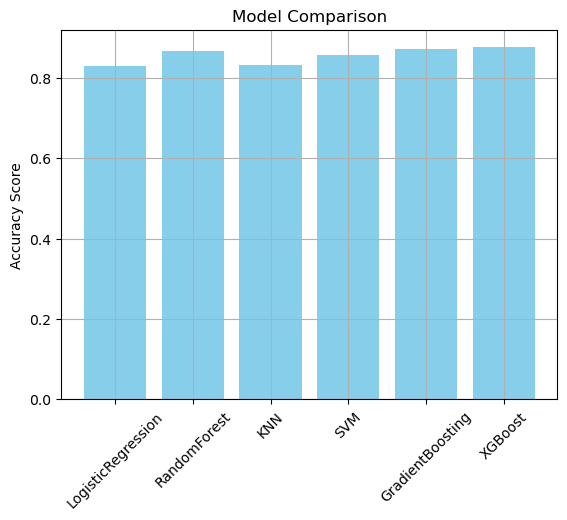

In [39]:
import matplotlib.pyplot as plt
accuracies = [acc for acc, model in results.values()]
plt.bar(results.keys(), accuracies, color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [40]:
# Save the best model
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")


✅ Saved best model as best_model.pkl


In [41]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("best_model.pkl")

st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="centered")

st.title("💼 Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# Sidebar inputs (these must match your training feature columns)
st.sidebar.header("Input Employee Details")

# ✨ Replace these fields with your dataset's actual input columns
age = st.sidebar.slider("Age", 18, 65, 30)
education = st.sidebar.selectbox("Education Level", [
    "Bachelors", "Masters", "PhD", "HS-grad", "Assoc", "Some-college"
])
occupation = st.sidebar.selectbox("Job Role", [
    "Tech-support", "Craft-repair", "Other-service", "Sales",
    "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct",
    "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv",
    "Protective-serv", "Armed-Forces"
])
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)
experience = st.sidebar.slider("Years of Experience", 0, 40, 5)

# Build input DataFrame (⚠️ must match preprocessing of your training data)
input_df = pd.DataFrame({
    'age': [age],
    'education': [education],
    'occupation': [occupation],
    'hours-per-week': [hours_per_week],
    'experience': [experience]
})

st.write("### 🔎 Input Data")
st.write(input_df)

# Predict button
if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    st.success(f"✅ Prediction: {prediction[0]}")

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())
    batch_preds = model.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')



Overwriting app.py


In [42]:
!pip install streamlit pyngrok

In [43]:
!streamlit run app.py

^C


In [54]:
!ngrok authtoken 30EVSHHUaHd2eHsajlRNomel8N7_5sDCm11efEt5XF9e46gSF

                                                                                                    
Installing ngrok ... 
                                                                                                    


Traceback (most recent call last):
  File "C:\Users\bvais\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\bvais\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\bvais\anaconda3\Scripts\ngrok.exe\__main__.py", line 7, in <module>
  File "C:\Users\bvais\anaconda3\lib\site-packages\pyngrok\ngrok.py", line 687, in main
    run(sys.argv[1:])
  File "C:\Users\bvais\anaconda3\lib\site-packages\pyngrok\ngrok.py", line 675, in run
    process.run_process(pyngrok_config.ngrok_path, args)
  File "C:\Users\bvais\anaconda3\lib\site-packages\pyngrok\process.py", line 312, in run_process
    subprocess.call(start)
  File "C:\Users\bvais\anaconda3\lib\subprocess.py", line 349, in call
    with Popen(*popenargs, **kwargs) as p:
  File "C:\Users\bvais\anaconda3\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\bvais

In [56]:
import os
import threading 

def run_streamlit():
    os.system('streamlit run app.py  --server.port 8501')
thread = threading.Thread(target=run_streamlit)
thread.start()

In [46]:
from pyngrok import ngrok
import time 
time.sleep(5)

public_url = ngrok.connect(8501)
print("Your Streamlit app is live here :",public_url)

OSError: [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software

In [57]:
import os
import threading

def run_streamlit():
    os.system('streamlit run app.py --server.port 8501')

# Start the Streamlit app in a separate thread
thread = threading.Thread(target=run_streamlit)
thread.start()

from pyngrok import ngrok
import time

time.sleep(5)  # wait for the Streamlit server to start

public_url = ngrok.connect(8501)
print("Your Streamlit app is live here:", public_url)


OSError: [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software

In [49]:
import os
from pyngrok import ngrok
import time

# Start Streamlit app
os.system('streamlit run app.py --server.port 8501 &')

# Wait for Streamlit to start
time.sleep(5)

# Open ngrok tunnel
public_url = ngrok.connect(8501)
print("Your Streamlit app is live here:",public_url)

OSError: [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software